# Arciaga - WeatherPy
---
## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | silainiai
City not found. Skipping...
Processing Record 2 of Set 1 | nakhon ratchasima
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | laikit, laikit ii (dimembe)
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | rio grande
Processing Record 13 of Set 1 | kinablangan
Processing Record 14 of Set 1 | mana
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | berrahal
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | urengoy
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nakhon ratchasima,15.0000,102.1667,21.28,71,17,2.72,TH,1704399479
1,ushuaia,-54.8000,-68.3000,9.81,76,100,5.14,AR,1704399480
2,margaret river,-33.9500,115.0667,13.20,82,17,5.40,AU,1704399480
3,cabo san lucas,22.8909,-109.9124,25.90,42,20,5.81,MX,1704399480
4,geraldton,-28.7667,114.6000,24.23,35,0,11.32,AU,1704399480


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nakhon ratchasima,15.0000,102.1667,21.28,71,17,2.72,TH,1704399479
1,ushuaia,-54.8000,-68.3000,9.81,76,100,5.14,AR,1704399480
2,margaret river,-33.9500,115.0667,13.20,82,17,5.40,AU,1704399480
3,cabo san lucas,22.8909,-109.9124,25.90,42,20,5.81,MX,1704399480
4,geraldton,-28.7667,114.6000,24.23,35,0,11.32,AU,1704399480


### Create the Scatter Plots Requested

#### Arciaga - Latitude Vs. Temperature

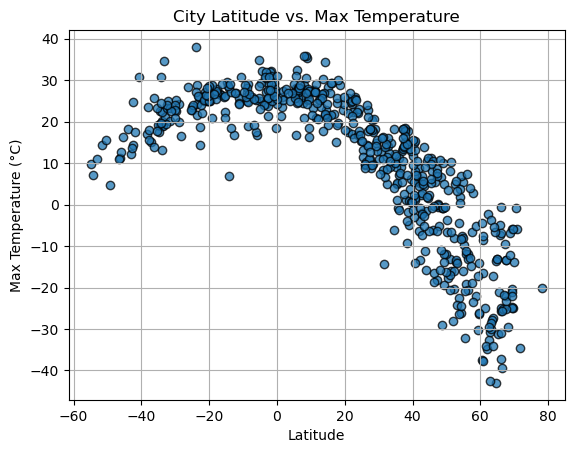

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Arciaga - Latitude Vs. Humidity

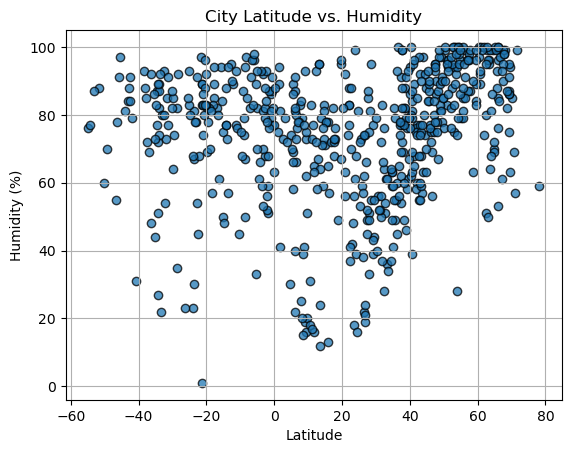

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Arciaga - Latitude Vs. Cloudiness

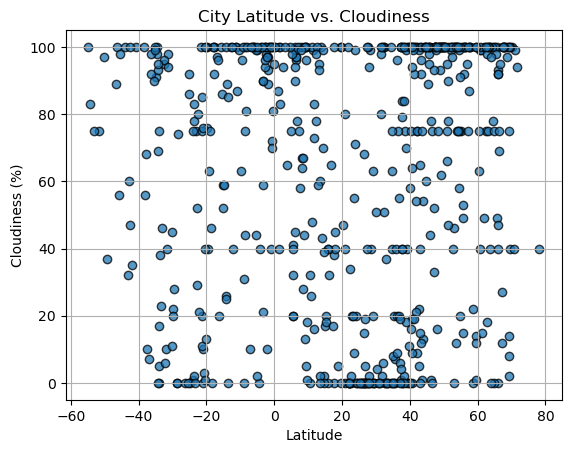

In [22]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Arciaga - Latitude Vs. Wind Speed Plot

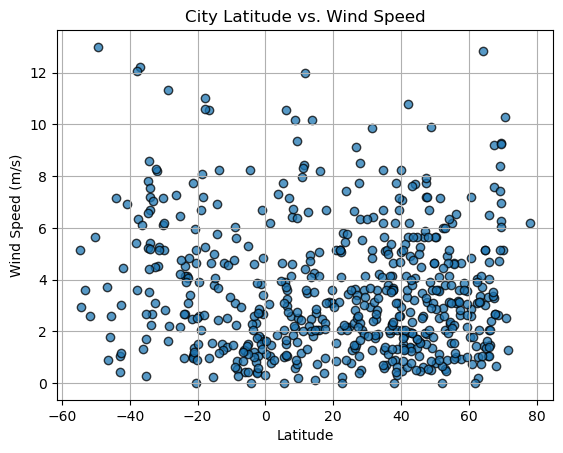

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere, file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    
    # Plot
    plt.scatter(x_values, y_values, alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation and r-value on the plot
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.annotate(f'R = {round(rvalue, 2)}', (min(x_values), min(y_values) + (max(y_values) - min(y_values)) * 0.9), fontsize=12, color="blue")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    # Save the figure
    plt.savefig(f"../output_data/{hemisphere}_{file_name}.png")

    # Show plot
    plt.show()

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nakhon ratchasima,15.0000,102.1667,21.28,71,17,2.72,TH,1704399479
3,cabo san lucas,22.8909,-109.9124,25.90,42,20,5.81,MX,1704399480
5,"laikit, laikit ii (dimembe)",1.4792,124.9735,23.47,94,40,1.03,ID,1704399480
7,tiksi,71.6872,128.8694,-34.52,99,94,1.27,RU,1704399481
8,yellowknife,62.4560,-114.3525,-32.62,80,75,3.09,CA,1704399209


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,9.81,76,100,5.14,AR,1704399480
2,margaret river,-33.9500,115.0667,13.20,82,17,5.40,AU,1704399480
4,geraldton,-28.7667,114.6000,24.23,35,0,11.32,AU,1704399480
6,port-aux-francais,-49.3500,70.2167,4.74,70,37,13.00,TF,1704399481
9,grytviken,-54.2811,-36.5092,7.22,77,83,2.95,GS,1704399199


### Arciaga - Temperature Vs. Latitude Linear Regression Plot

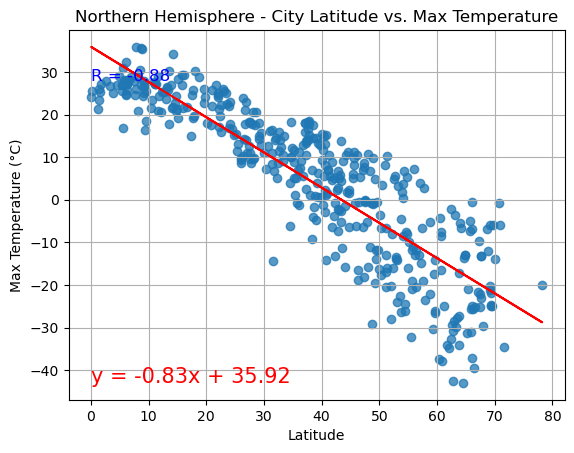

In [50]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", "northern", "Fig1_Northern")

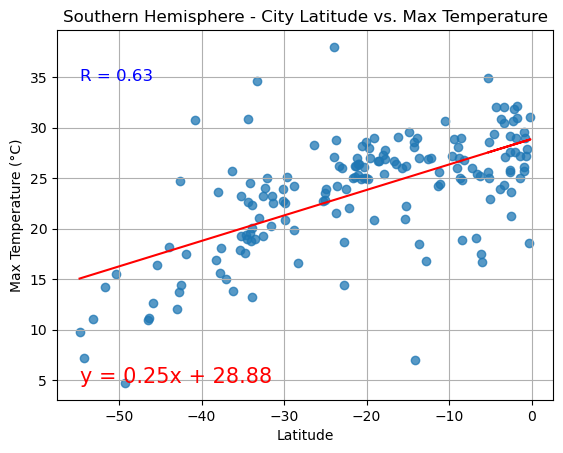

In [48]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - City Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature (°C)", "southern", "Fig1_Southern")

**Discussion about the linear relationship:** 
### Latitude Vs. Max Temperature:
- In the Northern Hemisphere, there is a negative linear relationship between latitude and maximum temperature. As latitude increases (moving towards the North Pole), the maximum temperature tends to decrease.
- In the Southern Hemisphere, there is a positive linear relationship. As latitude decreases (moving towards the South Pole), the maximum temperature tends to increase.
- This is consistent with the general expectation that temperatures are colder towards the poles and warmer towards the equator.

### Arciaga - Humidity vs. Latitude Linear Regression Plot

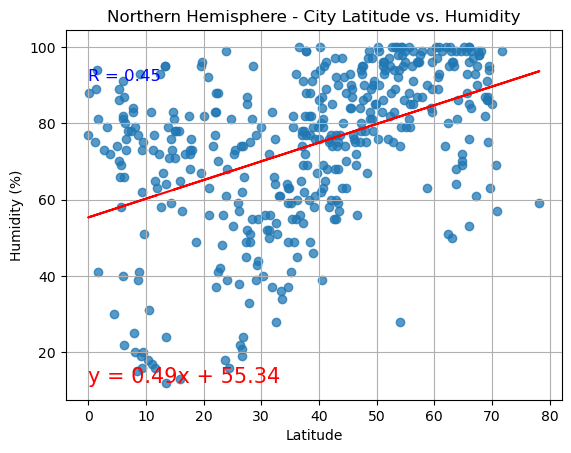

In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", "northern", "Fig2_Northern")

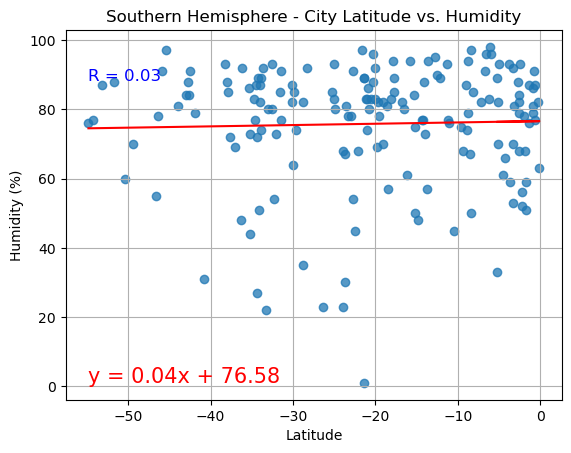

In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - City Latitude vs. Humidity",
                       "Latitude", "Humidity (%)", "southern", "Fig2_Southern")

**Discussion about the linear relationship:** 
### Latitude Vs. Humidity:
- In the Northern Hemisphere, there is a very slight correlation between latitude and humidity. 
- In the Southern Hemisphere, there is a negative relationship 
- These two correlations indicate that latitude alone may not be a strong predictor of humidity 

### Arciaga - Cloudiness vs. Latitude Linear Regression Plot

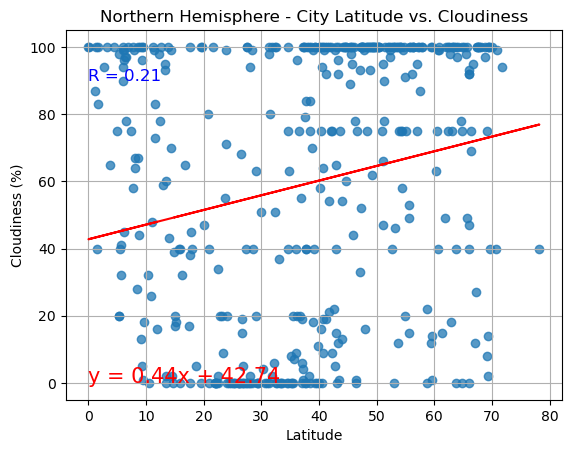

In [56]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "northern", "Fig3_Northern")

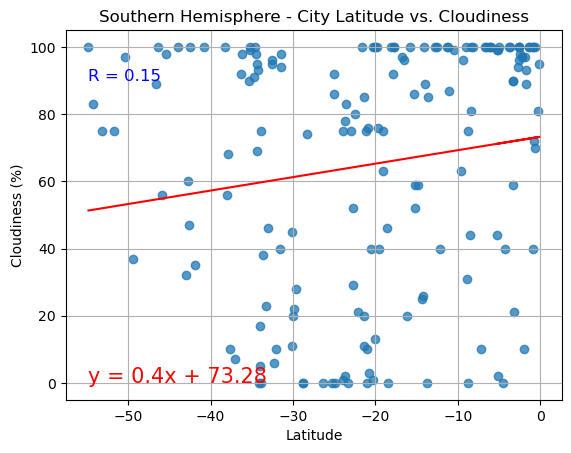

In [57]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - City Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness (%)", "southern", "Fig3_Southern")

**Discussion about the linear relationship:** 
### Cloudiness Vs. Latitude: 
- Both hemispheres exhibit a weak correlation between latitude and cloudiness. 
- The patterns observed in the Northern and Southern Hemispheres suggest that latitude alone is not a robust predictor of cloudiness, and other factors may play a more significant role in influencing cloud cover in specific geographic locations.

### Arciaga - Wind Speed vs. Latitude Linear Regression Plot

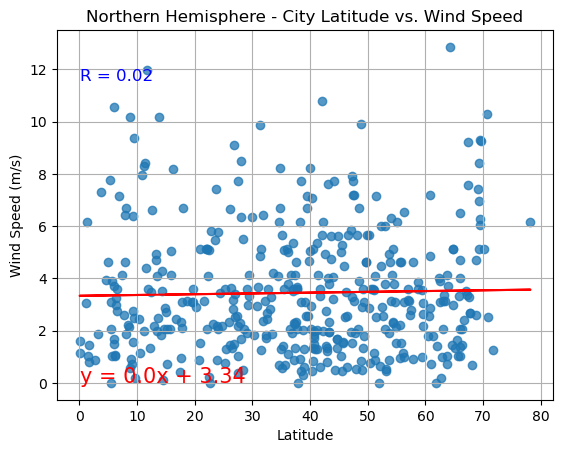

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", "northern", "Fig4_Northern")

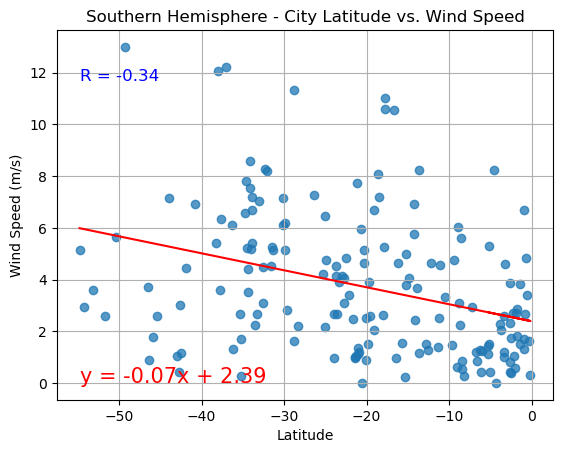

In [59]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - City Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed (m/s)", "southern", "Fig4_Southern")

**Discussion about the linear relationship:** 
### Wind Speed Vs. Latitude
- In both the Northern and Southern Hemispheres, there is a very weak positive correlation between latitude and wind speed. 
- The linear regression lines show a slight increase in wind speed with increasing latitude, but the overall correlation is minimal. 
- This indicates that latitude alone is not a strong predictor of wind speed, and other factors may have a more significant impact on wind patterns.